USING THE Oil And Natural Gas Corporation Ltd (ONGC) real time data from investing.com 
<br>Type: Equity
<br>Market: India
<br>ISIN: INE213A01029 
<br>S/N: ONGC

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [3]:
# This data contains data from 14/06/2021 to 14/06/2022 i.e. 1 year data
ongc_df = pd.read_csv("ONGC Historical Data.csv")
ongc_df

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jun 14, 2022",155.95,159.55,160.55,155.30,12.84M,-2.26%
1,"Jun 13, 2022",159.55,162.00,163.95,158.45,12.24M,-3.10%
2,"Jun 10, 2022",164.65,164.00,166.65,163.35,17.81M,-0.54%
3,"Jun 09, 2022",165.55,166.00,167.35,164.50,31.12M,1.32%
4,"Jun 08, 2022",163.40,163.50,166.40,162.10,45.99M,0.96%
...,...,...,...,...,...,...,...
245,"Jun 18, 2021",120.25,124.55,124.55,118.90,87.91M,-3.88%
246,"Jun 17, 2021",125.10,125.60,127.00,123.50,18.12M,-1.26%
247,"Jun 16, 2021",126.70,127.00,128.25,126.10,31.65M,1.08%
248,"Jun 15, 2021",125.35,125.60,128.50,124.85,32.78M,0.44%


In [4]:
ongc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      250 non-null    object 
 1   Price     250 non-null    float64
 2   Open      250 non-null    float64
 3   High      250 non-null    float64
 4   Low       250 non-null    float64
 5   Vol.      250 non-null    object 
 6   Change %  250 non-null    object 
dtypes: float64(4), object(3)
memory usage: 13.8+ KB


In [5]:
ongc_df['Date'] = pd.to_datetime(ongc_df['Date'])
ongc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      250 non-null    datetime64[ns]
 1   Price     250 non-null    float64       
 2   Open      250 non-null    float64       
 3   High      250 non-null    float64       
 4   Low       250 non-null    float64       
 5   Vol.      250 non-null    object        
 6   Change %  250 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 13.8+ KB


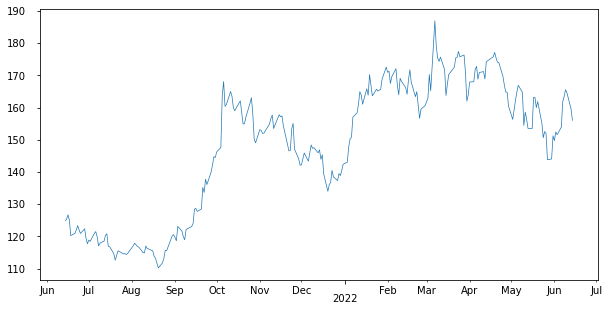

In [6]:
fig = plt.figure(figsize=(10,5))
ax = fig.gca()
ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator())
ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter('%b'))
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))
ax.tick_params(pad=10)

plt.style.use("fivethirtyeight")
plt.plot(ongc_df['Date'], ongc_df['Price'], linewidth=0.7)

<ipython-input-7-3a0b6a50fe50>:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fg.show()


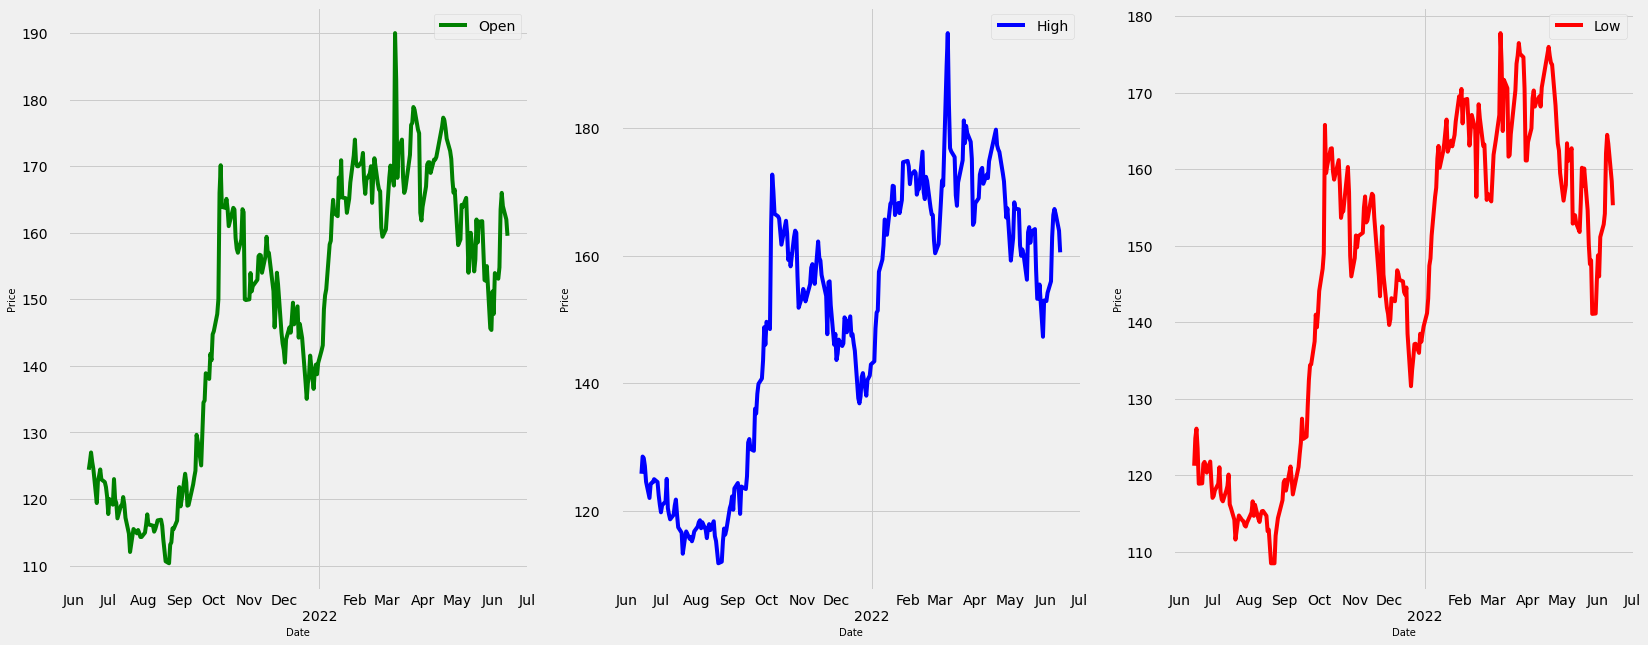

In [7]:
fg, ax = plt.subplots(1,3,figsize=(25,10))

for i in range(0,3):
    ax[i].xaxis.set_minor_locator(matplotlib.dates.MonthLocator())
    ax[i].xaxis.set_minor_formatter(matplotlib.dates.DateFormatter('%b'))
    ax[i].xaxis.set_major_locator(matplotlib.dates.YearLocator())
    ax[i].xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))

ax[0].plot(ongc_df['Date'],ongc_df['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=10)
ax[0].set_ylabel('Price',size=10)
ax[0].tick_params(pad=20)
ax[0].legend()

ax[1].plot(ongc_df['Date'],ongc_df['High'],label='High',color='blue')
ax[1].set_xlabel('Date',size=10)
ax[1].set_ylabel('Price',size=10)
ax[1].tick_params(pad=20)
ax[1].legend()

ax[2].plot(ongc_df['Date'],ongc_df['Low'],label='Low',color='red')
ax[2].set_xlabel('Date',size=10)
ax[2].set_ylabel('Price',size=10)
ax[2].tick_params(pad=20)
ax[2].legend()

fg.show()

In [8]:
ongc_df.drop(['Change %'],axis=1,inplace=True)
ongc_df.head()

,Date,Price,Open,High,Low,Vol.
0,2022-06-14,155.95,159.55,160.55,155.30,12.84M
1,2022-06-13,159.55,162.00,163.95,158.45,12.24M
2,2022-06-10,164.65,164.00,166.65,163.35,17.81M
3,2022-06-09,165.55,166.00,167.35,164.50,31.12M
4,2022-06-08,163.40,163.50,166.40,162.10,45.99M


In [9]:
ongc_df.drop(['Date'],axis=1).columns

Index(['Price', 'Open', 'High', 'Low', 'Vol.'], dtype='object')

In [10]:
ongc_df.head(3)

,Date,Price,Open,High,Low,Vol.
0,2022-06-14,155.95,159.55,160.55,155.30,12.84M
1,2022-06-13,159.55,162.00,163.95,158.45,12.24M
2,2022-06-10,164.65,164.00,166.65,163.35,17.81M


In [11]:
# Creating a new dataframe with only the 'open' column as we are going to predict this only to observe the daily/weekly/monthly market trend  
data = ongc_df.filter(['Open'])

dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

238

In [12]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.61770245],
       [0.64846202],
       [0.67357188],
       [0.69868173],
       [0.66729441],
       [0.55806654],
       [0.53672316],
       [0.54739485],
       [0.47018205],
       [0.5128688 ],
       [0.44005022],
       [0.44318895],
       [0.56057753],
       [0.53295669],
       [0.53421218],
       [0.59070935],
       [0.64532329],
       [0.6440678 ],
       [0.60514752],
       [0.64846202],
       [0.57313245],
       [0.55053358],
       [0.62335217],
       [0.61079724],
       [0.5480226 ],
       [0.62900188],
       [0.68926554],
       [0.67231638],
       [0.67608286],
       [0.61079724],
       [0.60012555],
       [0.7049592 ],
       [0.69868173],
       [0.72316384],
       [0.76271186],
       [0.77777778],
       [0.80100439],
       [0.82046453],
       [0.83553045],
       [0.84055242],
       [0.82423101],
       [0.76647834],
       [0.76145637],
       [0.76145637],
       [0.73634652],
       [0.7564344 ],
       [0.7564344 ],
       [0.752

In [13]:
# Creating the training data set 

train_data = scaled_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.61770245, 0.64846202, 0.67357188, 0.69868173, 0.66729441,
       0.55806654, 0.53672316, 0.54739485, 0.47018205, 0.5128688 ,
       0.44005022, 0.44318895, 0.56057753, 0.53295669, 0.53421218,
       0.59070935, 0.64532329, 0.6440678 , 0.60514752, 0.64846202,
       0.57313245, 0.55053358, 0.62335217, 0.61079724, 0.5480226 ,
       0.62900188, 0.68926554, 0.67231638, 0.67608286, 0.61079724,
       0.60012555, 0.7049592 , 0.69868173, 0.72316384, 0.76271186,
       0.77777778, 0.80100439, 0.82046453, 0.83553045, 0.84055242,
       0.82423101, 0.76647834, 0.76145637, 0.76145637, 0.73634652,
       0.7564344 , 0.7564344 , 0.75204018, 0.71060891, 0.67231638,
       0.64657878, 0.66101695, 0.81104834, 0.81795355, 0.85561833,
       0.8606403 , 0.83050847, 0.826742  , 0.77024482, 0.70621469])]
[0.6986817325800379]

[array([0.61770245, 0.64846202, 0.67357188, 0.69868173, 0.66729441,
       0.55806654, 0.53672316, 0.54739485, 0.47018205, 0.5128688 ,
       0.44005022, 0.44318895, 0.560

In [14]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
178/178 [==============================] - 11s 33ms/step - loss: 0.0206
Epoch 2/10
178/178 [==============================] - 6s 35ms/step - loss: 0.0076
Epoch 3/10
178/178 [==============================] - 7s 40ms/step - loss: 0.0070
Epoch 4/10
178/178 [==============================] - 6s 34ms/step - loss: 0.0059
Epoch 5/10
178/178 [==============================] - 6s 33ms/step - loss: 0.0046
Epoch 6/10
178/178 [==============================] - 6s 35ms/step - loss: 0.0069
Epoch 7/10
178/178 [==============================] - 6s 36ms/step - loss: 0.0055
Epoch 8/10
178/178 [==============================] - 6s 34ms/step - loss: 0.0042
Epoch 9/10
178/178 [==============================] - 7s 38ms/step - loss: 0.0052
Epoch 10/10
178/178 [==============================] - 7s 38ms/step - loss: 0.0038


In [15]:
# Creating the testing data set
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Getting the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Getting the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2.9228956813676934

#### Since the value of RMSE is 2.92 which is kind of good for stock data but could be improved, we can use the last 5 years data as well in order to make a better model which would make our model perform better.

<ipython-input-16-26efc7164f63>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


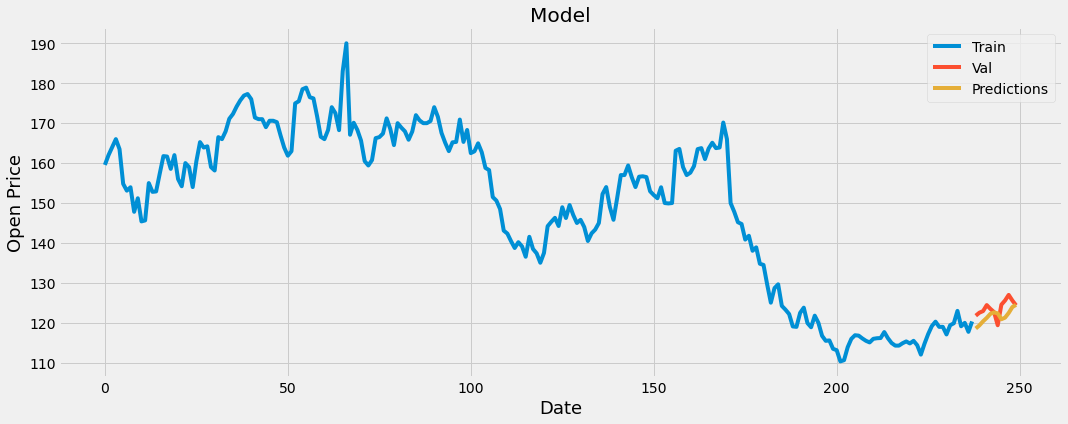

In [16]:
# Plotting the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price', fontsize=18)
plt.plot(train['Open'])
plt.plot(valid[['Open', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()

In [23]:
# Actual vs Predicted values
valid

,Open,Predictions
238,0.143754,0.110722
239,0.153170,0.123403
240,0.158192,0.138669
241,0.177024,0.151233
242,0.165097,0.166447
243,0.155053,0.171381
244,0.113622,0.167238
245,0.178280,0.144315
246,0.191463,0.152179
247,0.209040,0.170760


### The above created model can be used to predict the future stock open values
### In order to improve the model, we can use a more extensive data like taking the last 3-5 years of data and then training and also doing the hyperparameter tuning using GridSearchCV or RandomizedSearchCV to get better model fit.